<a href="https://colab.research.google.com/github/trudo311399/MNIST/blob/main/Ph%C3%A2n_lo%E1%BA%A1i_ch%E1%BB%AF_s%E1%BB%91_vi%E1%BA%BFt_tay_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('Shape training set {} and validation set {}.' .format(x_train.shape, x_val.shape))

Shape training set (60000, 28, 28) and validation set (10000, 28, 28).


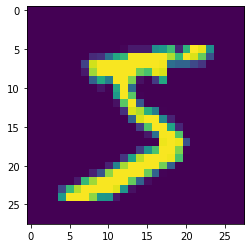

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

5

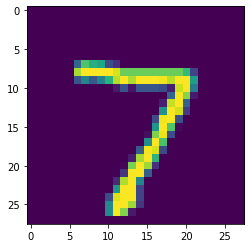

In [6]:
plt.imshow(x_val[0])

In [7]:
y_val[0]

7

In [8]:
# reshape lại dữ liệu
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [9]:
# one hot encoding label y
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)

In [10]:
print('Label y sau one-hot encoding {}'  .format(y_train[0]))

Label y sau one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
EPOCHS = 20
INPUT_SHAPE = (28, 28, 1)
MODEL_DIR = "/content/drive/MyDrive/AI_COLAB/MNIST/models/"
MODEL_FILE = "validation_new"

In [12]:
# định nghia model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))

model.add(BatchNormalization())

model.add(Conv2D(364, (3, 3), activation='relu'))

model.add(MaxPool2D())

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPool2D())

# flatten chuyển tensor sang vector
model.add(Flatten())

# thêm fully connected layer với 256 nodes dùng hàm sigmoid
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.3))

# output layer có 10 nodes và dùng softmax function để chuyển sang xác xuất
model.add(Dense(10, activation='softmax'))

# compile model, loss function: categorical crossentropy, phương thức để tối ưu loss function (optimizer): adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# hiển thị model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 364)       105196    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 364)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       419456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [13]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(filepath=MODEL_DIR + MODEL_FILE + ".{epoch:02d}-{val_loss:.2f}.hdf5")

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, callbacks=callbacks, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 994s 529ms/step - loss: 0.4071 - accuracy: 0.8774 - val_loss: 0.0571 - val_accuracy: 0.9828
Epoch 2/20
1875/1875 [==============================] - 984s 525ms/step - loss: 0.0855 - accuracy: 0.9782 - val_loss: 0.0670 - val_accuracy: 0.9841
Epoch 3/20
1875/1875 [==============================] - 981s 523ms/step - loss: 0.0572 - accuracy: 0.9851 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 4/20
1875/1875 [==============================] - 982s 524ms/step - loss: 0.0468 - accuracy: 0.9878 - val_loss: 0.0385 - val_accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 984s 525ms/step - loss: 0.0420 - accuracy: 0.9893 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 6/20
1875/1875 [==============================] - 987s 526ms/step - loss: 0.0384 - accuracy: 0.9901 - val_loss: 0.0389 - val_accuracy: 0.9899
Epoch 7/20
1875/1875 [==============================] - 991s 528ms/step - loss: 0.0337 - accuracy: 0.9917 - val_

In [16]:
model.save(MODEL_DIR + 'mnist_model.h5')

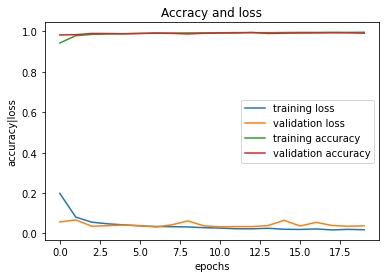

In [18]:
import numpy as np

# vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
x = np.arange(EPOCHS)
plt.plot(x, history.history['loss'], label='training loss')
plt.plot(x, history.history['val_loss'], label='validation loss')
plt.plot(x, history.history['accuracy'], label='training accuracy')
plt.plot(x, history.history['val_accuracy'], label='validation accuracy')
plt.title('Accracy and loss')
plt.xlabel('epochs')
plt.ylabel('accuracy|loss')
plt.legend()
plt.show()